# Grab Data Safety Challenge Exploration

Objectives: To determine if a certain drive is a safe drive or reckless drive
How to know:
    1. From the acceleration at the certain point
    2. From the Location and any other geolocation behavior

## Opening Pickles for easy dataframe generation

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

df_merge = pd.read_pickle('df_merge.pickle')
df_safety = pd.read_pickle('df_safety.pickle')
df_label = pd.read_pickle('df_label.pickle')

In [4]:
print(df_merge.shape)
print(df_safety.shape)
print(df_label.shape)

(16154418, 12)
(16135561, 11)
(20018, 2)


# Let's do an exploratory analysis

To explore and understand the dataset
- Viewing the data
    - Create a grouping of merged Booking ID.
    - Find out the aggregations of each variable.
    - Correlation Analysis
    - Graphing using matplotlib
- Comparing models and discuss improvements

Challenges:
Cleaning out the data

In [95]:
# Describing the dataset
df_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
Accuracy,16154418.0,11.607443,8.686924e+01,0.750000,3.900000,4.255000,8.000000,6.070101e+03
Bearing,16154418.0,168.977125,1.072962e+02,0.000000,78.000000,168.962120,263.000000,3.599995e+02
acceleration_x,16154418.0,0.069311,1.423701e+00,-78.419685,-0.507825,0.061600,0.635379,6.687346e+01
acceleration_y,16154418.0,4.464359,8.132821e+00,-72.994119,-2.113992,9.081207,9.709685,7.505589e+01
acceleration_z,16154418.0,0.892730,3.252890e+00,-78.448420,-0.933767,0.774093,2.749072,7.805576e+01
gyro_x,16154418.0,-0.001713,1.445047e-01,-48.455750,-0.026783,-0.000644,0.023300,3.983975e+01
gyro_y,16154418.0,0.000266,3.398832e-01,-74.888610,-0.029947,0.000262,0.031418,8.031496e+01
gyro_z,16154418.0,-0.000254,1.480109e-01,-53.554450,-0.018759,-0.000035,0.018234,6.630078e+01
second,16154418.0,3799.904859,1.435848e+06,0.000000,241.000000,520.000000,863.000000,1.495797e+09
Speed,16154418.0,9.006626,8.106292e+00,-2.000000,1.020000,7.530000,15.480000,1.480186e+02


In [9]:
# Describing the dataset (non numerical values)
df_merge.describe(include=['object'])

,bookingID
count,20018
unique,20000
top,395136991308
freq,2


In [8]:
df_label.describe(include=['object'])

,bookingID
count,20018
unique,20000
top,395136991308
freq,2


### From here we can find out that the number of unique bookingID of df_label == df_merge. Means that the  merging was successful

### Seems like we have a clean data with values for all 1.6 million rows for our  df_merge

# Hypothesis list:
1. Can reckless and safety driving be determined by the average of speed. Reckless driving would most likely drive it faster most of the time.
2. Can reckless and safety driving be determined by the std of speed. Reckless driving would mean that your speed changes errartically over the time

In [23]:
df_aggregate_mean = df_merge.groupby(['bookingID']).mean()
df_aggregate_mean['label'] = df_aggregate_mean['label'].astype(int)

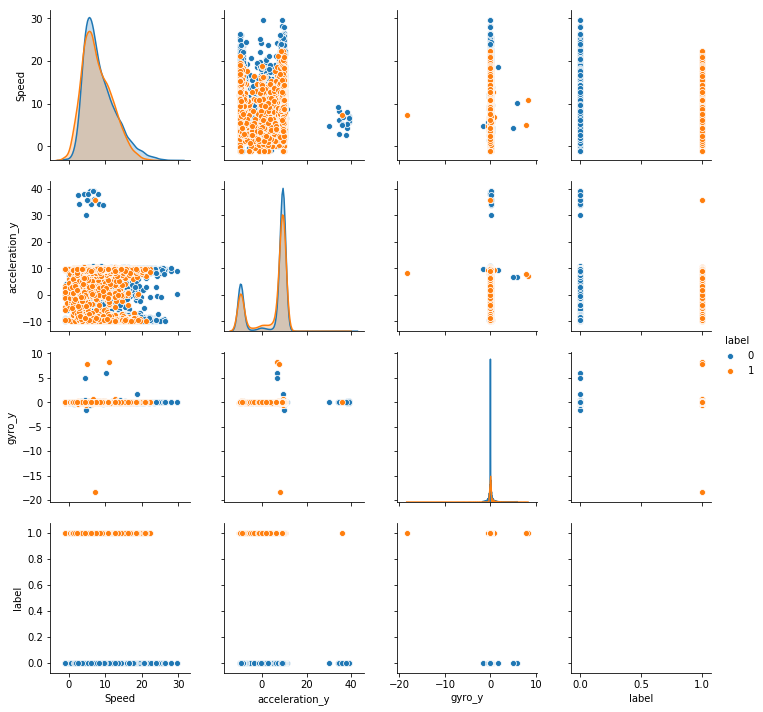

In [59]:
# To get pairplot
# g = sns.pairplot(df_aggregate_mean, hue="label")

# Comparison with speed
g = sns.pairplot(df_aggregate_mean[['Speed','acceleration_y','gyro_y','label']], hue="label")



### This does not make much differences, which means that we should not aggregate it on the mean level.

In [39]:
df_aggregate_std = df_merge.drop(columns=['label']).groupby(['bookingID']).std()

In [51]:
df_aggregate_std['label'] = df_aggregate_mean['label']

In [54]:
df_aggregate_std.dtypes

Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
label               int32
dtype: object

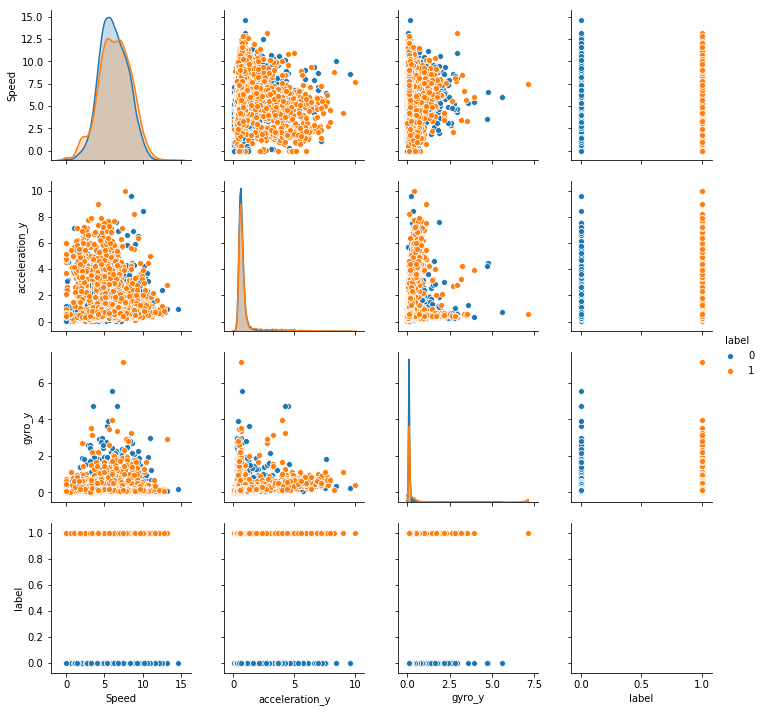

In [57]:
# Comparison with speed
g = sns.pairplot(df_aggregate_std[['Speed','acceleration_y','gyro_y','label']], hue="label")

In [53]:
df_aggregate_mean_reckless = df_aggregate_mean[df_aggregate_mean['label']==1]
df_aggregate_mean_safe = df_aggregate_mean[df_aggregate_mean['label']==0]

0.0    14999
1.0     4983
0.5       18
Name: label, dtype: int64


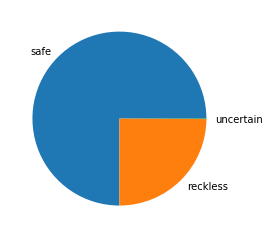

In [111]:
# Import seaborn and matplotlib with matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Getting the count of people that leave and not
labelcounts=df_aggregate_mean['label'].value_counts()
print(labelcounts)

# Using matplotlib pie chart and label the pie chart
plt.pie(labelcounts,labels=['safe','reckless','uncertain']);

C:\new_software\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


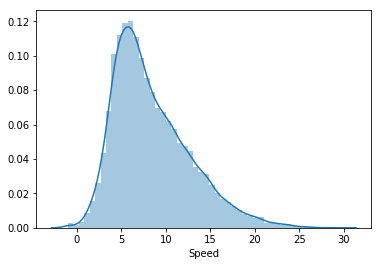

In [112]:
# Getting the distribution of label
sns.distplot(df_aggregate_mean['Speed']);

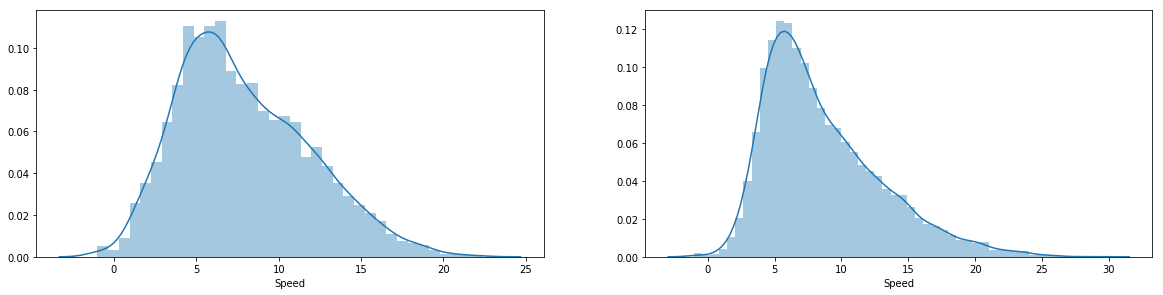

In [117]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# Tell pointplot to plot on ax1 with the ax argument (speed)
sns.distplot(df_aggregate_mean_reckless['Speed'],ax = ax1);
# Tell the factorplot to plot on ax2 with the ax argument (speed)
sns.distplot(df_aggregate_mean_safe['Speed'],ax = ax2);

### In terms of speed: It is actually quite similar amongst the reckless and the safe drivings

In [125]:
df_aggregate_mean.corr()

,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
Accuracy,1.000000,0.001813,-0.005855,-0.202641,-0.124867,-0.028799,0.004703,0.002909,0.001258,-0.042222,0.006292
Bearing,0.001813,1.000000,-0.002346,-0.115312,-0.079200,-0.004892,-0.005136,-0.017744,0.002727,0.114007,-0.023058
acceleration_x,-0.005855,-0.002346,1.000000,0.068627,0.017269,-0.004121,0.001024,0.007346,-0.000444,0.005519,-0.005662
acceleration_y,-0.202641,-0.115312,0.068627,1.000000,0.397860,0.147207,-0.011017,0.009202,0.006165,-0.003668,-0.006896
acceleration_z,-0.124867,-0.079200,0.017269,0.397860,1.000000,0.100788,-0.014717,-0.005362,0.001114,-0.014707,0.033185
gyro_x,-0.028799,-0.004892,-0.004121,0.147207,0.100788,1.000000,0.075257,-0.002129,-0.017067,-0.014603,0.018658
gyro_y,0.004703,-0.005136,0.001024,-0.011017,-0.014717,0.075257,1.000000,-0.026305,0.001036,0.007790,-0.003615
gyro_z,0.002909,-0.017744,0.007346,0.009202,-0.005362,-0.002129,-0.026305,1.000000,0.014570,0.007451,0.001477
second,0.001258,0.002727,-0.000444,0.006165,0.001114,-0.017067,0.001036,0.014570,1.000000,-0.004278,-0.005410
Speed,-0.042222,0.114007,0.005519,-0.003668,-0.014707,-0.014603,0.007790,0.007451,-0.004278,1.000000,-0.072966


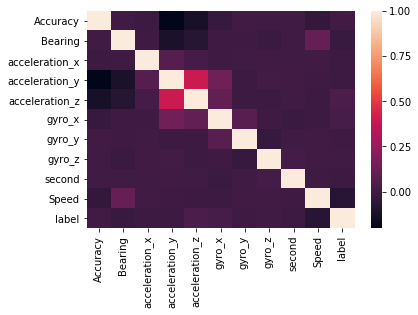

In [124]:
sns.heatmap(df_aggregate_mean.corr())

### There is no clear correlation yet

### Find the individual pattern

In [69]:
df_merge_A = df_merge[df_merge['bookingID']==1202590843006]
df_merge_A_sort = df_merge_A.sort_values(['second'], ascending=[1])

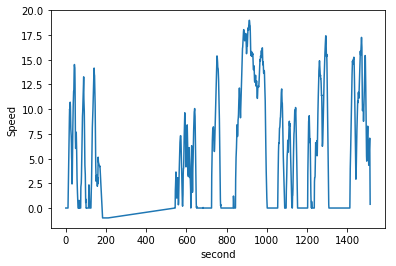

In [75]:
ax = sns.lineplot(x="second", y="Speed", data=df_merge_A)

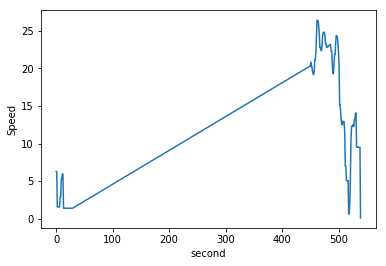

In [112]:
df_merge_C = df_merge[df_merge['bookingID']==317827579936]
df_merge_C_sort = df_merge_C.sort_values(['second'], ascending=[1])

ax = sns.lineplot(x="second", y="Speed", data=df_merge_C)

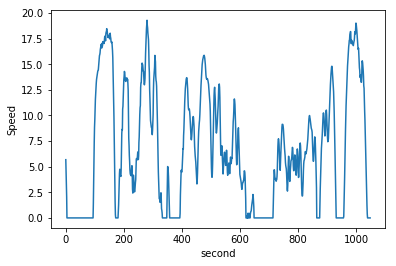

In [83]:
df_merge_B = df_merge[df_merge['bookingID']==1073741824054]
df_merge_B_sort = df_merge_B.sort_values(['second'], ascending=[1])
ax = sns.lineplot(x="second", y="Speed", data=df_merge_B)

## Hypothesis
Number of...
1. Number of sharp breaks
2. Number of sharp acceleration
3. Number of sharp turns (gyrometer)

Extreme of ...
1. Extreme min speed
2. Extreme max speed
3. Extreme min acceleration
4. Extreme max acceleration
5. Extreme sharp turn

In [115]:
df_merge_reckless = df_merge[df_merge['label']==1]
df_merge_safe = df_merge[df_merge['label']==0]

## Number of

## Extreme of

In [ ]:
# Min Speed
df_merge_min = df_merge[['bookingID','Speed','gyro_y','label']].groupby('bookingID').min()
sns.scatterplot(x="Speed", y="gyro_y",hue="label",data=df_merge_min)

In [ ]:
# Max Speed

df_merge_max = df_merge[['bookingID','Speed','gyro_y','label']].groupby('bookingID').max()
sns.scatterplot(x="Speed", y="gyro_y",hue="label",data=df_merge_max)

In [113]:
mavg_A = df_merge_A_sort['Speed'].rolling(window=5).mean()
mavg_B = df_merge_B_sort['Speed'].rolling(window=5).mean()
mavg_C = df_merge_C_sort['Speed'].rolling(window=5).mean()

In [97]:
mavg_A.describe()

count    1147.000000
mean        5.457932
std         5.664345
min        -1.000000
25%         0.000000
50%         4.068759
75%         9.896033
max        18.782180
Name: Speed, dtype: float64

In [95]:
mavg_B.describe()

count    1040.000000
mean        6.701784
std         5.771733
min         0.000000
25%         0.355521
50%         5.793985
75%        11.216734
max        18.807048
Name: Speed, dtype: float64

In [114]:
mavg_C.describe()

count    116.000000
mean      13.743790
std        8.658852
min        1.392740
25%        4.690259
50%       12.905744
75%       22.890001
max       25.861685
Name: Speed, dtype: float64

## Find the describe abnormalities

In [102]:
pd.concat([mavg_A.describe(),mavg_B.describe()], axis=1).T

,count,mean,std,min,25%,50%,75%,max
Speed,1147.0,5.457932,5.664345,-1.0,0.000000,4.068759,9.896033,18.782180
Speed,1040.0,6.701784,5.771733,0.0,0.355521,5.793985,11.216734,18.807048


In [109]:
bookingID_list_reckless = df_merge_reckless['bookingID'].unique()
bookingID_list_safe = df_merge_safe['bookingID'].unique()

In [ ]:
def combine_describe:
    